# Description and Details:
In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Polynomial regression with a small penalty:
    * Use the pre-built implementation of regression  to run polynomial regression
    * Use matplotlib to visualize polynomial regressions on four datasets
    * Use a pre-built implementation of regression to run polynomial regression, this time with L2_small_penalty
    * Observe overfitting: Use matplotlib to visualize polynomial regressions under L2_small_penalty
* Polynomial regression with an appropriate penalty:
    * Use matplotlib to visualize polynomial regressions under L2_large_penalty
    * Choose best L2 penalty by building hands-on cross-validation function
    * Another option to choose best L2 penalty: using sklearn.ridgeCV
    * Assess the final fit using test data.

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Load Data

In [29]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

## Polynomial Regression with L2 Regularization

In [30]:
def polynomial(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            tmp = feature.apply(lambda x: x**power)
            poly_dataframe[name] = tmp

    return poly_dataframe

In [31]:
poly15_data = polynomial(sales['sqft_living'], 15) 
poly15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59
9254,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59
3914,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60
7252,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


In [32]:
l2_small_penalty = 1.5e-5
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])
print(model.coef_)

[ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


## Observe Overfitting

In [33]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')#, dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [34]:
print(set_1.shape)
print(set_2.shape)
print(set_3.shape)
print(set_4.shape)

(5404, 21)
(5398, 21)
(5409, 21)
(5402, 21)


In [35]:
l2_small_penalty = 1.5e-5
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)

### for set_1:

In [36]:
poly1_data = polynomial(set_1['sqft_living'], 15)
features = poly1_data.columns
poly1_data['price'] = set_1['price']

print(poly1_data.min())
print(poly1_data.shape)

model.fit(poly1_data[features], poly1_data['price'])
print(model.intercept_)

#plt.plot(poly1_data['power_1'], poly1_data['price'],'.')
#plt.plot(poly1_data['power_1'], model.predict(poly1_data[features]), ',', color = 'red', alpha = 1)

power_1     4.300000e+02
power_2     1.849000e+05
power_3     7.950700e+07
power_4     3.418801e+10
power_5     1.470084e+13
power_6     6.321363e+15
power_7     2.718186e+18
power_8     1.168820e+21
power_9     5.025926e+23
power_10    2.161148e+26
power_11    9.292937e+28
power_12    3.995963e+31
power_13    1.718264e+34
power_14    7.388536e+36
power_15    3.177070e+39
price       8.000000e+04
dtype: float64
(5404, 16)
288998.10746196454


### Loop over set_1-4 :

In [37]:
print('all csv files in data directory:', glob.glob('wk3_kc_house_set_*_data.csv'))

all csv files in data directory: ['wk3_kc_house_set_1_data.csv', 'wk3_kc_house_set_4_data.csv', 'wk3_kc_house_set_3_data.csv', 'wk3_kc_house_set_2_data.csv']


(5404, 16)
   power_1  power_2
0      430   184900
1      460   211600
coefficient of power_1 is: 288998.10746196454
wk3_kc_house_set_1_data.csv


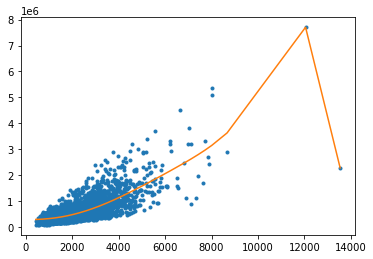

(5402, 16)
   power_1  power_2
0      290    84100
1      370   136900
coefficient of power_1 is: 175579.19735926937
wk3_kc_house_set_4_data.csv


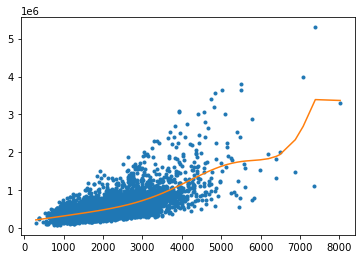

(5409, 16)
   power_1  power_2
0      390   152100
1      480   230400
coefficient of power_1 is: 174149.60431198956
wk3_kc_house_set_3_data.csv


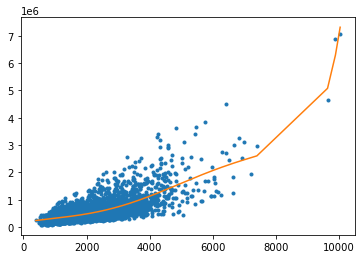

(5398, 16)
   power_1  power_2
0      390   152100
1      410   168100
coefficient of power_1 is: 113497.43719180545
wk3_kc_house_set_2_data.csv


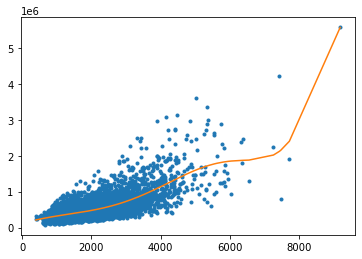

In [71]:
for filename in glob.glob('wk3_kc_house_set_*_data.csv'):      # loop over datasets
    raw_data = pd.read_csv(filename)
    poly_data = polynomial(raw_data['sqft_living'], 15)
    features = poly_data.columns
    poly_data['price'] = raw_data['price']
    print(poly_data.shape)
    print(poly_data.iloc[:2,:2])
    model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model.fit(poly_data[features], poly_data['price'])
    print('coefficient of power_1 is:', model.intercept_)
    plt.plot(poly_data['power_1'],poly_data['price'],'.',
        poly_data['power_1'], model.predict(poly_data[features]),'-')
    print(filename)
    plt.show()

## Ridge Regresion comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above.

In [39]:
l2_large_penalty = 1.23e2

(5404, 16)
   power_1  power_2
0      430   184900
1      460   211600
coefficient of power_1 is: 539103.0310577955
wk3_kc_house_set_1_data.csv


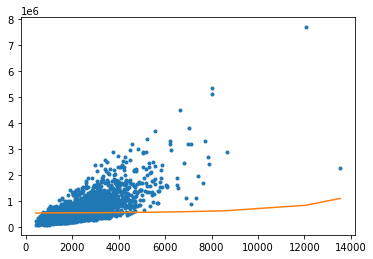

(5402, 16)
   power_1  power_2
0      290    84100
1      370   136900
coefficient of power_1 is: 524562.9690466832
wk3_kc_house_set_4_data.csv


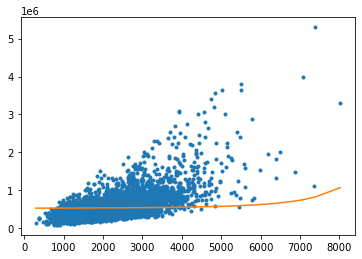

(5409, 16)
   power_1  power_2
0      390   152100
1      480   230400
coefficient of power_1 is: 533640.1140974432
wk3_kc_house_set_3_data.csv


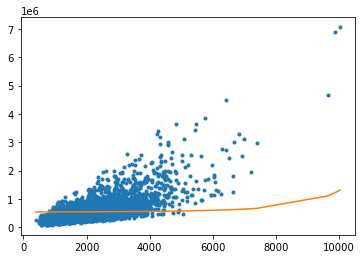

(5398, 16)
   power_1  power_2
0      390   152100
1      410   168100
coefficient of power_1 is: 529853.0253577976
wk3_kc_house_set_2_data.csv


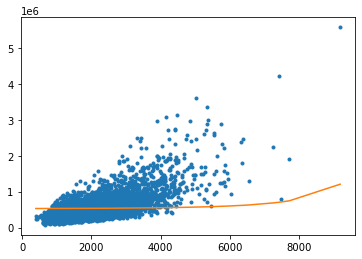

In [40]:
for filename in glob.glob('wk3_kc_house_set_*_data.csv'):      # loop over datasets
    raw_data = pd.read_csv(filename)
    poly_data = polynomial(raw_data['sqft_living'], 15)
    features = poly_data.columns
    poly_data['price'] = raw_data['price']
    print(poly_data.shape)
    print(poly_data.iloc[:2,:2])
    model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    model.fit(poly_data[features], poly_data['price'])
    print('coefficient of power_1 is:', model.intercept_)
    plt.plot(poly_data['power_1'],poly_data['price'],'.',
        poly_data['power_1'], model.predict(poly_data[features]),'-')
    print(filename)
    plt.show()

## Selecting an L2 penalty via hands-on cross-validation

In [41]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [42]:
len(train_valid_shuffled)

19396

In [43]:
n = len(train_valid_shuffled)
k = 10  # number of folds

for i in range(10):
    start = round((n*i)/k)
    end = round((n*(i+1))/k)
    print(i, (start, end), len(range(start, end)))

0 (0, 1940) 1940
1 (1940, 3879) 1939
2 (3879, 5819) 1940
3 (5819, 7758) 1939
4 (7758, 9698) 1940
5 (9698, 11638) 1940
6 (11638, 13577) 1939
7 (13577, 15517) 1940
8 (15517, 17456) 1939
9 (17456, 19396) 1940


In [44]:
poly_data = polynomial(train_valid_shuffled['sqft_living'], 15)
features = poly_data.columns                       # get the name of the features
poly_data['price'] = train_valid_shuffled['price'] # add price to the data since 
poly_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,2800.0,7840000.0,2.195200e+10,6.146560e+13,1.721037e+17,4.818903e+20,1.349293e+24,3.778020e+27,1.057846e+31,2.961968e+34,8.293509e+37,2.322183e+41,6.502111e+44,1.820591e+48,5.097655e+51,665000.0
1,2490.0,6200100.0,1.543825e+10,3.844124e+13,9.571869e+16,2.383395e+20,5.934654e+23,1.477729e+27,3.679545e+30,9.162067e+33,2.281355e+37,5.680573e+40,1.414463e+44,3.522012e+47,8.769810e+50,645000.0
2,2340.0,5475600.0,1.281290e+10,2.998220e+13,7.015834e+16,1.641705e+20,3.841590e+23,8.989320e+26,2.103501e+30,4.922192e+33,1.151793e+37,2.695196e+40,6.306758e+43,1.475781e+47,3.453328e+50,640000.0
3,1320.0,1742400.0,2.299968e+09,3.035958e+12,4.007464e+15,5.289853e+18,6.982606e+21,9.217040e+24,1.216649e+28,1.605977e+31,2.119890e+34,2.798254e+37,3.693696e+40,4.875678e+43,6.435895e+46,594000.0
4,1904.0,3625216.0,6.902411e+09,1.314219e+13,2.502273e+16,4.764328e+19,9.071281e+22,1.727172e+26,3.288535e+29,6.261371e+32,1.192165e+36,2.269882e+39,4.321856e+42,8.228813e+45,1.566766e+49,365000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2480.0,6150400.0,1.525299e+10,3.782742e+13,9.381200e+16,2.326538e+20,5.769813e+23,1.430914e+27,3.548666e+30,8.800692e+33,2.182572e+37,5.412777e+40,1.342369e+44,3.329075e+47,8.256105e+50,325000.0
19392,1670.0,2788900.0,4.657463e+09,7.777963e+12,1.298920e+16,2.169196e+19,3.622558e+22,6.049671e+25,1.010295e+29,1.687193e+32,2.817612e+35,4.705412e+38,7.858038e+41,1.312292e+45,2.191528e+48,545000.0
19393,2403.0,5774409.0,1.387590e+10,3.334380e+13,8.012515e+16,1.925407e+20,4.626754e+23,1.111809e+27,2.671677e+30,6.420040e+33,1.542736e+37,3.707193e+40,8.908386e+43,2.140685e+47,5.144066e+50,519900.0
19394,3780.0,14288400.0,5.401015e+10,2.041584e+14,7.717187e+17,2.917097e+21,1.102662e+25,4.168064e+28,1.575528e+32,5.955497e+35,2.251178e+39,8.509452e+42,3.216573e+46,1.215865e+50,4.595968e+53,1153000.0


In [45]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    poly_data = polynomial(data['sqft_living'], 15)
    features = poly_data.columns                       
    poly_data['price'] = data['price']     
    RSS_final = np.zeros((k, len(l2_penalty)))
    n = len(data)
    for i in range(k):
        start = round((n*i)/k)
        end = round((n*(i+1))/k)
        validation_set = poly_data[start:end]
        train_set = poly_data[0:start].append(poly_data[end:n+1])
        for j in range(len(l2_penalty)):
            model = linear_model.Ridge(alpha = l2_penalty[j], normalize=True)
            model.fit(train_set[features], train_set[output])
            predictions = model.predict(validation_set[features])
            RSS = np.sum((validation_set[output] - predictions)**2)
            RSS_final[i][j] = RSS
    return RSS_final.mean(axis = 0)         

In [61]:
a = np.logspace(-5, 1, num = 20)
cv_error = k_fold_cross_validation(k = 10, l2_penalty = a, data = train_valid_shuffled, output = 'price')

In [62]:
result = pd.DataFrame({'a': a, 'error': cv_error})
result.set_index('a', inplace = True)   # 把a设为index

bestlam = result.index[result['error'] == result['error'].min()].tolist()
bestlam

[0.06158482110660261]

The penalties are: 
 [1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01] 

The average validation error are: 
 [2.12721097e+14 4.68515068e+14 6.94153920e+14 7.63463191e+14
 6.91513195e+14 5.57978406e+14 4.20863037e+14 2.99383684e+14
 2.04776499e+14 1.48592223e+14 1.26044160e+14 1.20453079e+14
 1.19850480e+14 1.20133800e+14 1.21125799e+14 1.24331935e+14
 1.34245911e+14 1.58319145e+14 1.93852057e+14 2.23690752e+14]


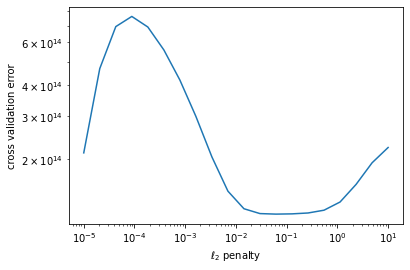

In [63]:
plt.plot(a,cv_error)
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('cross validation error')
plt.xscale('log')
plt.yscale('log')
print ('The penalties are:','\n', a, '\n')
print ('The average validation error are:', '\n', cv_error)

## Another option to choose L2 penalty : using sklearn.RidgeCV

In [52]:
from sklearn.linear_model import RidgeCV

In [53]:
poly_data = polynomial(train_valid_shuffled['sqft_living'], 15)  # 产生1-15次项
features = poly_data.columns                       
poly_data['price'] = train_valid_shuffled['price']
poly_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,2800.0,7840000.0,2.195200e+10,6.146560e+13,1.721037e+17,4.818903e+20,1.349293e+24,3.778020e+27,1.057846e+31,2.961968e+34,8.293509e+37,2.322183e+41,6.502111e+44,1.820591e+48,5.097655e+51,665000.0
1,2490.0,6200100.0,1.543825e+10,3.844124e+13,9.571869e+16,2.383395e+20,5.934654e+23,1.477729e+27,3.679545e+30,9.162067e+33,2.281355e+37,5.680573e+40,1.414463e+44,3.522012e+47,8.769810e+50,645000.0
2,2340.0,5475600.0,1.281290e+10,2.998220e+13,7.015834e+16,1.641705e+20,3.841590e+23,8.989320e+26,2.103501e+30,4.922192e+33,1.151793e+37,2.695196e+40,6.306758e+43,1.475781e+47,3.453328e+50,640000.0
3,1320.0,1742400.0,2.299968e+09,3.035958e+12,4.007464e+15,5.289853e+18,6.982606e+21,9.217040e+24,1.216649e+28,1.605977e+31,2.119890e+34,2.798254e+37,3.693696e+40,4.875678e+43,6.435895e+46,594000.0
4,1904.0,3625216.0,6.902411e+09,1.314219e+13,2.502273e+16,4.764328e+19,9.071281e+22,1.727172e+26,3.288535e+29,6.261371e+32,1.192165e+36,2.269882e+39,4.321856e+42,8.228813e+45,1.566766e+49,365000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2480.0,6150400.0,1.525299e+10,3.782742e+13,9.381200e+16,2.326538e+20,5.769813e+23,1.430914e+27,3.548666e+30,8.800692e+33,2.182572e+37,5.412777e+40,1.342369e+44,3.329075e+47,8.256105e+50,325000.0
19392,1670.0,2788900.0,4.657463e+09,7.777963e+12,1.298920e+16,2.169196e+19,3.622558e+22,6.049671e+25,1.010295e+29,1.687193e+32,2.817612e+35,4.705412e+38,7.858038e+41,1.312292e+45,2.191528e+48,545000.0
19393,2403.0,5774409.0,1.387590e+10,3.334380e+13,8.012515e+16,1.925407e+20,4.626754e+23,1.111809e+27,2.671677e+30,6.420040e+33,1.542736e+37,3.707193e+40,8.908386e+43,2.140685e+47,5.144066e+50,519900.0
19394,3780.0,14288400.0,5.401015e+10,2.041584e+14,7.717187e+17,2.917097e+21,1.102662e+25,4.168064e+28,1.575528e+32,5.955497e+35,2.251178e+39,8.509452e+42,3.216573e+46,1.215865e+50,4.595968e+53,1153000.0


In [54]:
a = np.logspace(-5,1, num = 20)
clf = RidgeCV(alphas = a, cv = 10, normalize = True).fit(poly_data[features], 
                                                         poly_data['price'])

In [60]:
print('The coefficients are:', '\n', clf.coef_, '\n')
print('The best lambda is:', '\n', clf.alpha_, '\n')

The coefficients are: 
 [ 1.05610267e+02  1.96526164e-02  1.89387889e-06  7.94261306e-11
  2.11961626e-15  5.42471437e-20  6.07087592e-25 -2.09040013e-28
 -3.80778103e-32 -4.62543386e-36 -4.73247609e-40 -4.39169315e-44
 -3.83049649e-48 -3.20437096e-52 -2.60335061e-56] 

The best lambda is: 
 0.06158482110660261 



In [69]:
bestlam_auto = clf.alpha_

In [70]:
if bestlam_auto == bestlam:
    print('Pass!')

Pass!


### Retrain the model on full training set using selected lambda

In [64]:
final_data = polynomial(train_valid_shuffled['sqft_living'], 15)
features = final_data.columns                       
final_data['price'] = train_valid_shuffled['price']  
final_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,2800.0,7840000.0,2.195200e+10,6.146560e+13,1.721037e+17,4.818903e+20,1.349293e+24,3.778020e+27,1.057846e+31,2.961968e+34,8.293509e+37,2.322183e+41,6.502111e+44,1.820591e+48,5.097655e+51,665000.0
1,2490.0,6200100.0,1.543825e+10,3.844124e+13,9.571869e+16,2.383395e+20,5.934654e+23,1.477729e+27,3.679545e+30,9.162067e+33,2.281355e+37,5.680573e+40,1.414463e+44,3.522012e+47,8.769810e+50,645000.0
2,2340.0,5475600.0,1.281290e+10,2.998220e+13,7.015834e+16,1.641705e+20,3.841590e+23,8.989320e+26,2.103501e+30,4.922192e+33,1.151793e+37,2.695196e+40,6.306758e+43,1.475781e+47,3.453328e+50,640000.0
3,1320.0,1742400.0,2.299968e+09,3.035958e+12,4.007464e+15,5.289853e+18,6.982606e+21,9.217040e+24,1.216649e+28,1.605977e+31,2.119890e+34,2.798254e+37,3.693696e+40,4.875678e+43,6.435895e+46,594000.0
4,1904.0,3625216.0,6.902411e+09,1.314219e+13,2.502273e+16,4.764328e+19,9.071281e+22,1.727172e+26,3.288535e+29,6.261371e+32,1.192165e+36,2.269882e+39,4.321856e+42,8.228813e+45,1.566766e+49,365000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2480.0,6150400.0,1.525299e+10,3.782742e+13,9.381200e+16,2.326538e+20,5.769813e+23,1.430914e+27,3.548666e+30,8.800692e+33,2.182572e+37,5.412777e+40,1.342369e+44,3.329075e+47,8.256105e+50,325000.0
19392,1670.0,2788900.0,4.657463e+09,7.777963e+12,1.298920e+16,2.169196e+19,3.622558e+22,6.049671e+25,1.010295e+29,1.687193e+32,2.817612e+35,4.705412e+38,7.858038e+41,1.312292e+45,2.191528e+48,545000.0
19393,2403.0,5774409.0,1.387590e+10,3.334380e+13,8.012515e+16,1.925407e+20,4.626754e+23,1.111809e+27,2.671677e+30,6.420040e+33,1.542736e+37,3.707193e+40,8.908386e+43,2.140685e+47,5.144066e+50,519900.0
19394,3780.0,14288400.0,5.401015e+10,2.041584e+14,7.717187e+17,2.917097e+21,1.102662e+25,4.168064e+28,1.575528e+32,5.955497e+35,2.251178e+39,8.509452e+42,3.216573e+46,1.215865e+50,4.595968e+53,1153000.0


In [65]:
final_model = linear_model.Ridge(alpha = bestlam, normalize=True)
final_model.fit(final_data[features], final_data['price'])

Ridge(alpha=[0.06158482110660261], normalize=True)

In [66]:
test_data = pd.read_csv('wk3_kc_house_test_data.csv')
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [67]:
final_test_data = polynomial(test_data['sqft_living'], 15)
features = final_test_data.columns                       
final_test_data['price'] = test_data['price']  
final_test_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,1890,3572100,6751269000,12759898410000,24116207994900000,45579633110361000000,86145506578582290000000,162815007433520528100000000,307720364049353798109000000000,581591488053278678426010000000000,1099207912420696702225158900000000000,2077502954475116767205550321000000000000,3926480583957970690018490106690000000000000,7421048303680564604134946301644100000000000000,1402578129395626710181504851010734900000000000...,323000.0
1,1810,3276100,5929741000,10732831210000,19426424490100000,35161828327081000000,63642909272016610000000,115193665782350064100000000,208500535066053616021000000000,377385968469557044998010000000000,683068602929898251446398100000000000,1236354171303115835117980561000000000000,2237801050058639661563544815410000000000000,4050419900606137787430016115892100000000000000,7331260020097109395248329169764701000000000000000,530000.0
2,1200,1440000,1728000000,2073600000000,2488320000000000,2985984000000000000,3583180800000000000000,4299816960000000000000000,5159780352000000000000000000,6191736422400000000000000000000,7430083706880000000000000000000000,8916100448256000000000000000000000000,10699320537907200000000000000000000000000,12839184645488640000000000000000000000000000,15407021574586368000000000000000000000000000000,189000.0
3,2330,5428900,12649337000,29472955210000,68671985639300000,160005726539569000000,372813342837195770000000,868655088810666144100000000,2023966356928852115753000000000,4715841611644225429704490000000000,10987910955131045251211461700000000000,25601832525455335435322705761000000000000,59652269784310931564301904423130000000000000,138989788597444470544823437305892900000000000000,3238462074320456163694386089227304570000000000...,687500.0
4,1220,1488400,1815848000,2215334560000,2702708163200000,3297303959104000000,4022710830106880000000,4907707212730393600000000,5987402799531080192000000000,7304631415427917834240000000000,8911650326822059757772800000000000,10872213398722912904482816000000000000,13264100346441953743469035520000000000000,16182202422659183567032223334400000000000000,19742286955644203951779312467968000000000000000,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,1980,3920400,7762392000,15369536160000,30431681596800000,60254729561664000000,119304364532094720000000,236222641773547545600000000,467720830711624140288000000000,926087244809015797770240000000000,1833652744721851279585075200000000000,3630632434549265533578448896000000000000,7188652220407545756485328814080000000000000,14233531396406940597840951051878400000000000000,2818239216488574238372508308271923200000000000...,405000.0
2213,2198,4831204,10618986392,23340532089616,51302489532975968,112762871993481177664,247852792641671628505472,544780438226394239455027456,1197427403221614538322150348288,2631945432281108755232086465537024,5785016060153877044000126051250378752,12715465300218221742712277060648332496896,27948592729879651390481584979305034828177408,61431006820275473756278523784512466552333942784,1350253529909654913163001952783584014820300062...,388000.0
2214,2850,8122500,23149125000,65975006250000,188028767812500000,535881988265625000000,1527263666557031250000000,4352701449687539062500000000,12405199131609486328125000000000,35354817525087036035156250000000000,100761229946498052700195312500000000000,287169505347519450195556640625000000000000,818433090240430433057336425781250000000000000,2332534307185226734213408813476562500000000000000,6647722775477896192508215118408203125000000000...,608500.0
2215,1140,1299600,1481544000,1688960160000,1925414582400000,2194972623936000000,2502268791287040000000,2852586422067225600000000,3251948521156637184000000000,3707221314118566389760000000000,4226232298095165684326400000000000,4817904819828488880132096000000000000,5492411494604477323350589440000000000000,6261349103849104148619671961600000000000000,713793797838797872942642603622400000000

In [68]:
final_prediction = final_model.predict(final_test_data[features])
RSS_final = np.sum((final_test_data['price'] - final_prediction)**2)
RSS_final

137217989273738.3